In [2]:
# import package
import pandas as pd
import os
import math
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Get TEJ TSMC's stock data
stock_data = pd.read_excel("台積電2020報酬率&股價.xlsx")

stock_data.head()

,證券代碼,年月日,日報酬率 %,未調整收盤價(元)
0,2330 台積電,2020-01-02,2.4169,339.0
1,2330 台積電,2020-01-03,0.1475,339.5
2,2330 台積電,2020-01-06,-2.2091,332.0
3,2330 台積電,2020-01-07,-0.7530,329.5
4,2330 台積電,2020-01-08,0.0000,329.5


In [7]:
# Put Price and return into two different list
stock_return = list(stock_data["日報酬率 %"])
stock_price = list(stock_data["未調整收盤價(元)"])

In [9]:
#Compute the stock's volatility and mean return in 2020

# Mean of Return
mean_return = sum(stock_return) / len(stock_return)

# Volatility
X_bar = sum(stock_price) / len(stock_price)
Xi = []
for i in range(len(stock_price) - 1):
    x = np.log(stock_price[i+1]/stock_price[i])
    x = x ** 2
    Xi.append(x)
    
volatility = math.sqrt(sum(Xi))

print("Mean of TSMC's return : " , mean_return)
print("TSMC's volatility in 2020 year : " , volatility)

Mean of TSMC's return :  0.22166816326530597
TSMC's volatility in 2020 year :  0.2962571110599736


In [11]:
# Predict data
stock_data_2021 = pd.read_excel("台積電2021報酬率&股價.xlsx")
stock_price_2021 = list(stock_data_2021["未調整收盤價(元)"])

stock_data.head()

,證券代碼,年月日,日報酬率 %,未調整收盤價(元)
0,2330 台積電,2021-01-04,1.1321,536
1,2330 台積電,2021-01-05,1.1194,542
2,2330 台積電,2021-01-06,1.2915,549
3,2330 台積電,2021-01-07,2.9144,565
4,2330 台積電,2021-01-08,2.6549,580


In [28]:
#%%

# Monte Carlo Simulation
# formula :  ds / s  = u * dt + vol * epsilon * sqrt(dt)

# s = initial price 
s = stock_price_2021[0]

#  u = Mean of Return

# dt = time interval
dt = 1 / len(stock_price)

# vol = volatility


In [12]:
# Function to predict stock price
def monte_carlo(s):
    # epsilon = sample of standard normal distribution
    epsilon = np.random.normal(0,1)
    ds = ((mean_return * dt) + (volatility * epsilon * math.sqrt(dt))) * s
    s += ds
    return(s)

In [29]:
# predict the stock price in 2021
stock_price_predict = []

#  stock market open 242 days in 2021
for i in range(0,242):
    s = int(monte_carlo(s))
    stock_price_predict.append(s)

In [69]:

# Get Stock market open date
DatePeriod = pd.date_range("2021/1/1", "2021/12/31", freq='B')
DatePeriod_list = list(DatePeriod.strftime('%m-%d'))

# Delete the stock market close date 
date_remove = ["01-01","01-04","02-04",'02-05',
               "02-09","02-10","02-11",'02-12',
               "02-15","02-16","02-17",'03-01',
               "04-02","04-05","04-30",'06-14',
               "09-20","09-21","10-10",'12-31']
Date = []
for m in DatePeriod_list:
	if m not in date_remove:
		Date.append(m)

Text(0.5, 1.0, 'Predict price in January')

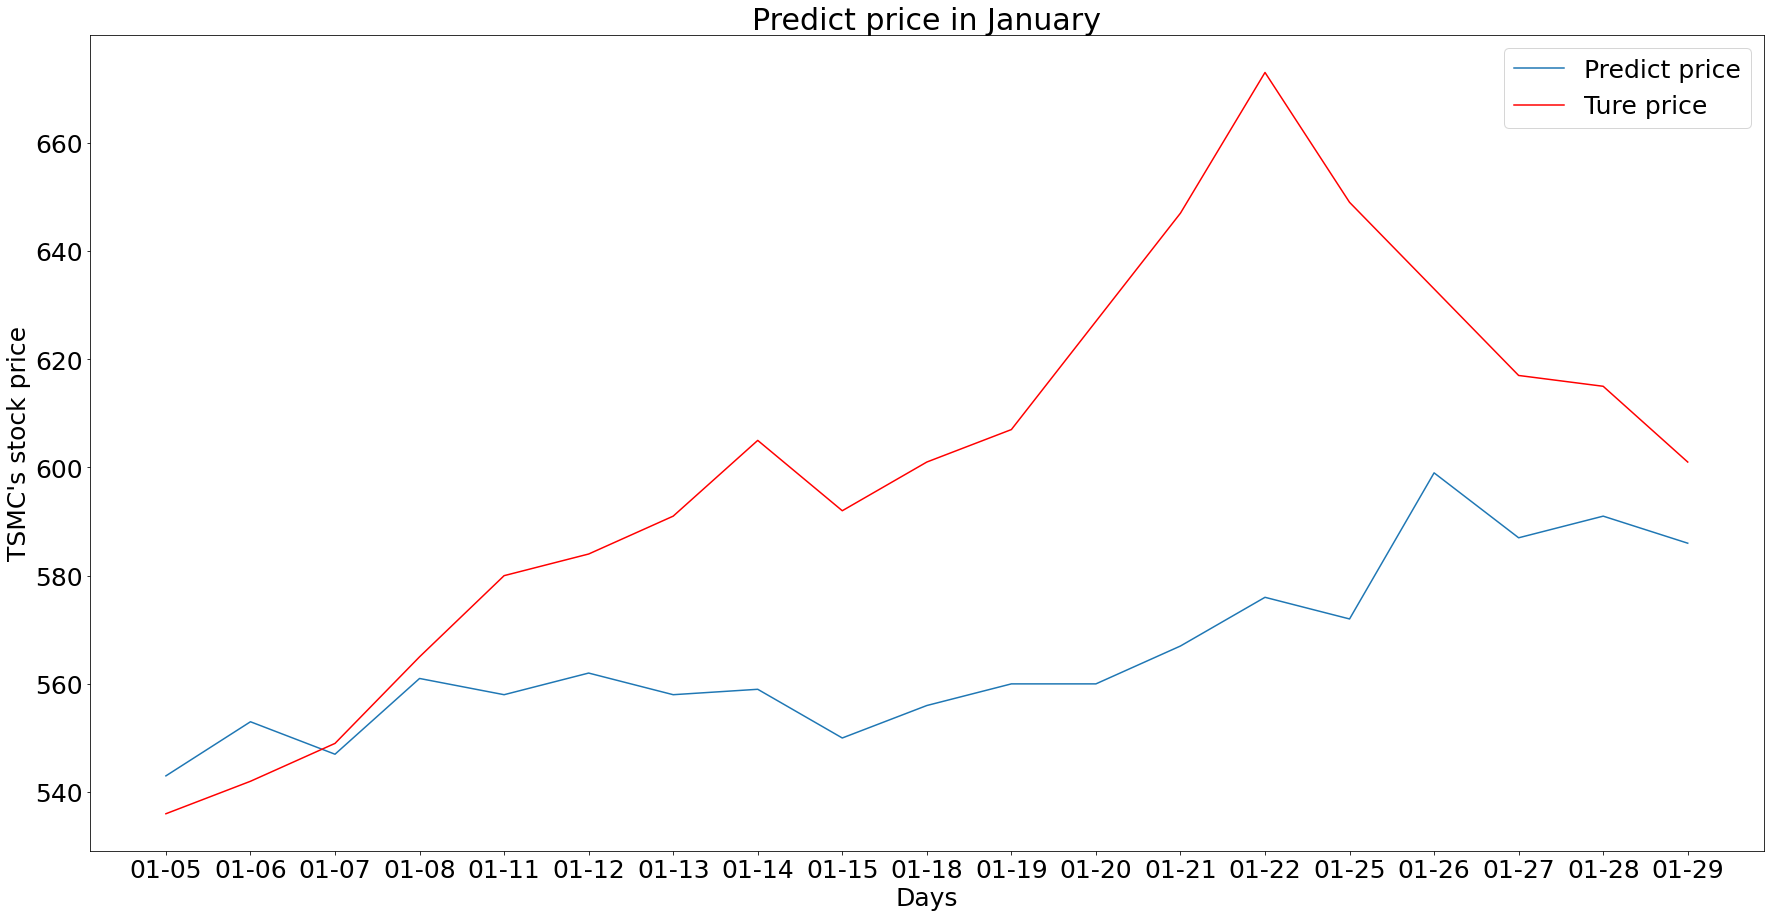

In [96]:
# Draw line chart of TSMC's predict price and actual price from January to March 
plt.rcParams.update({'font.size': 25})   
plt.figure(figsize=(30,15))
plt.plot(Date[0:19],stock_price_predict[0:19], label = "Predict price")
plt.plot(Date[0:19],stock_price_2021[0:19] , color = "r" , label = "Ture price")
plt.xlabel("Days")
plt.ylabel("TSMC's stock price")
plt.legend()
plt.title("Predict price in January")

Text(0.5, 1.0, 'Predict price in February')

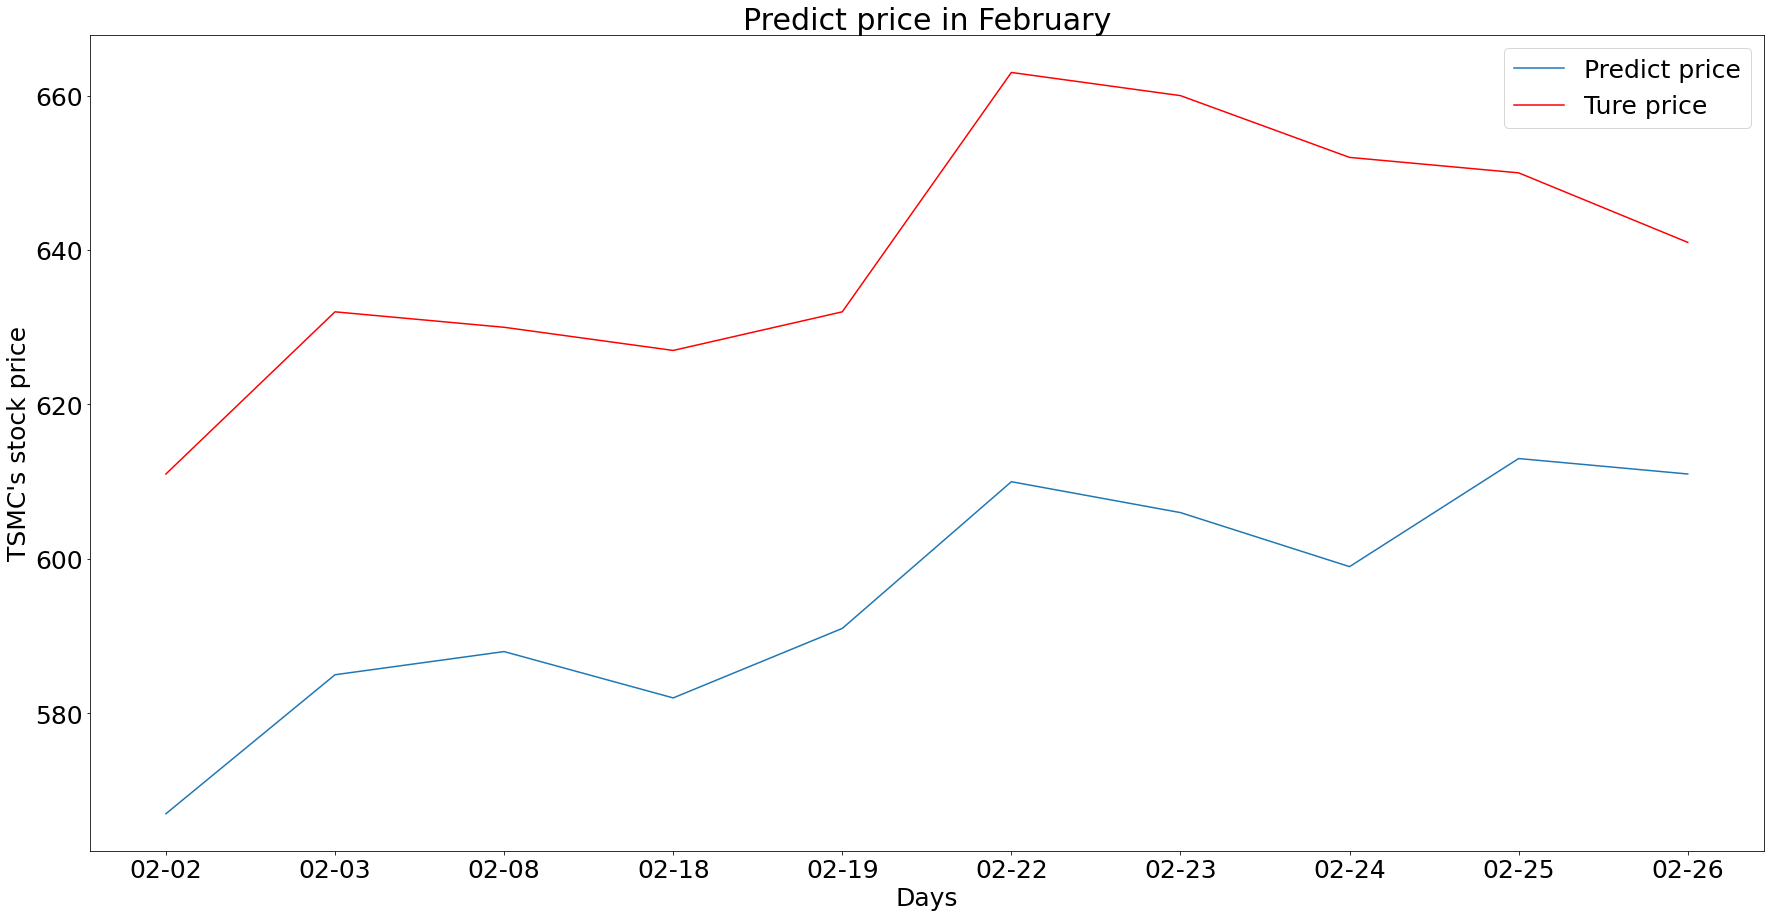

In [97]:
# February
plt.rcParams.update({'font.size': 25})   
plt.figure(figsize=(30,15))
plt.plot(Date[20:30],stock_price_predict[20:30], label = "Predict price")
plt.plot(Date[20:30],stock_price_2021[20:30] , color = "r" , label = "Ture price")
plt.xlabel("Days")
plt.ylabel("TSMC's stock price")
plt.legend()
plt.title("Predict price in February")

Text(0.5, 1.0, 'Predict price in March')

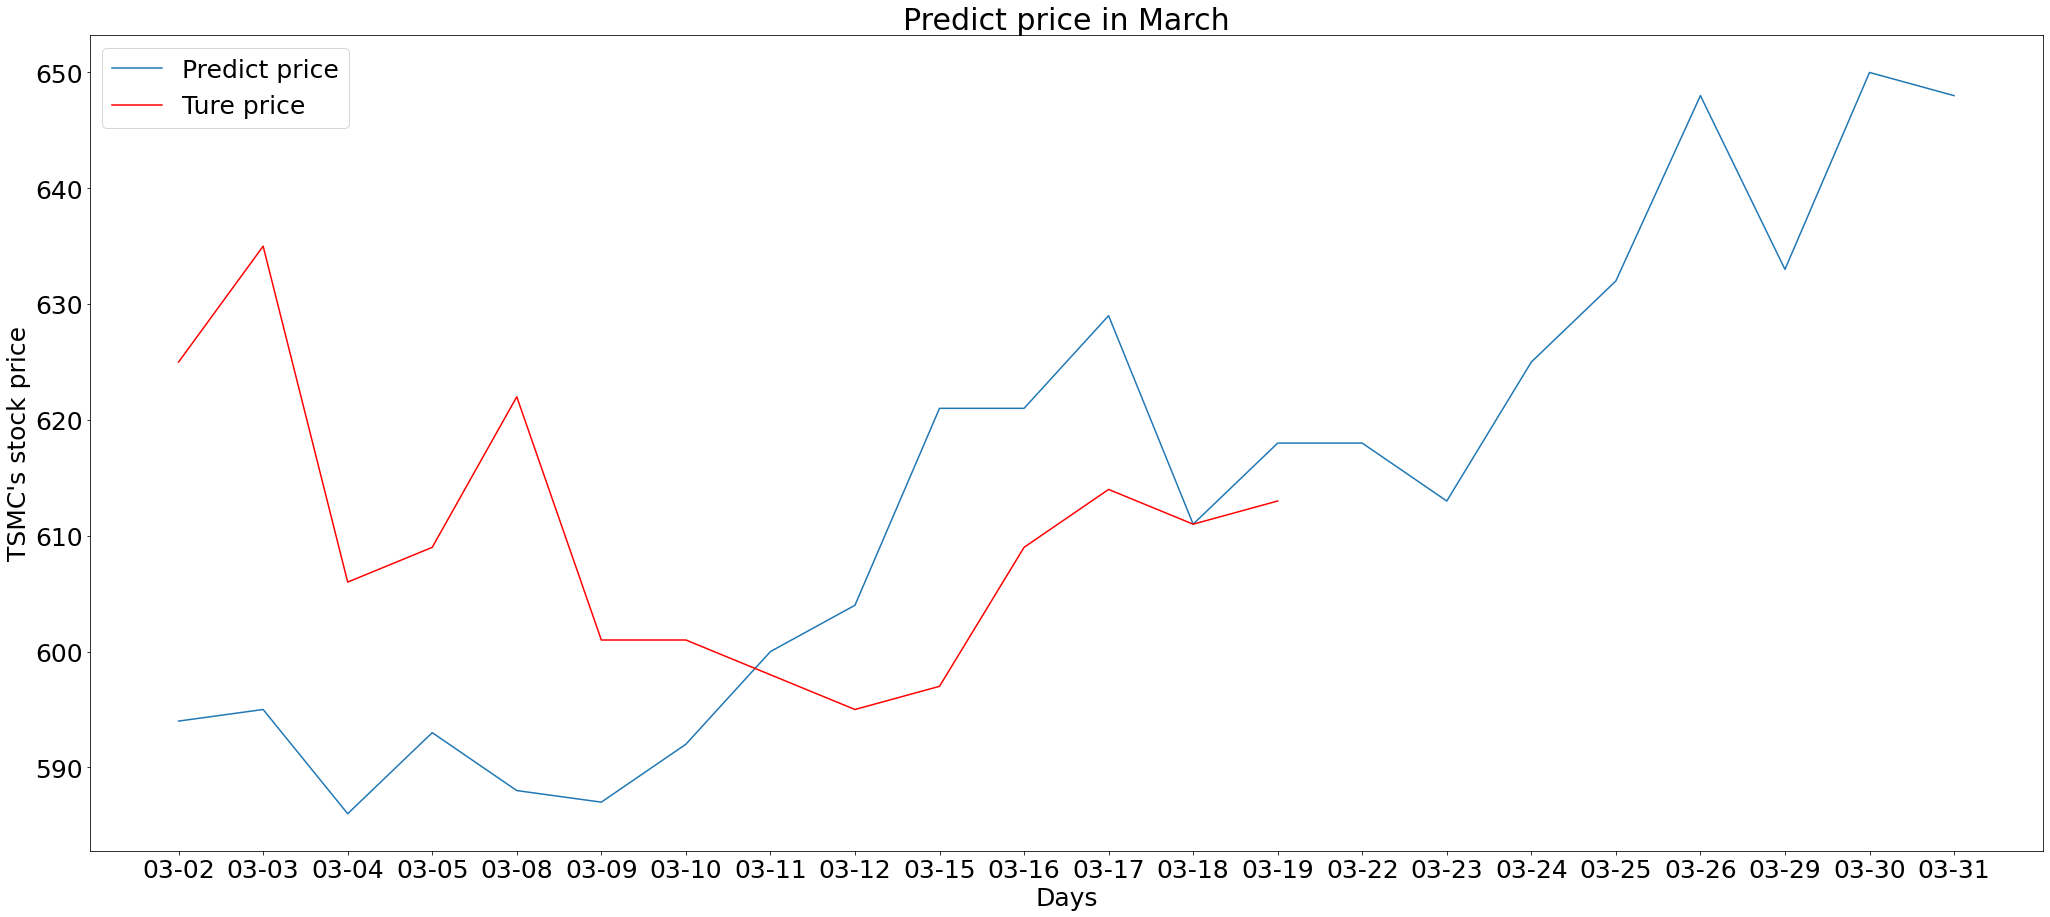

In [98]:
# March
plt.rcParams.update({'font.size': 25})   
plt.figure(figsize=(35,15))
plt.plot(Date[30:52],stock_price_predict[30:52], label = "Predict price")
plt.plot(Date[30:len(stock_price_2021)],stock_price_2021[30:len(stock_price_2021)] , color = "r" , label = "Ture price")
plt.xlabel("Days")
plt.ylabel("TSMC's stock price")
plt.legend()
plt.title("Predict price in March")


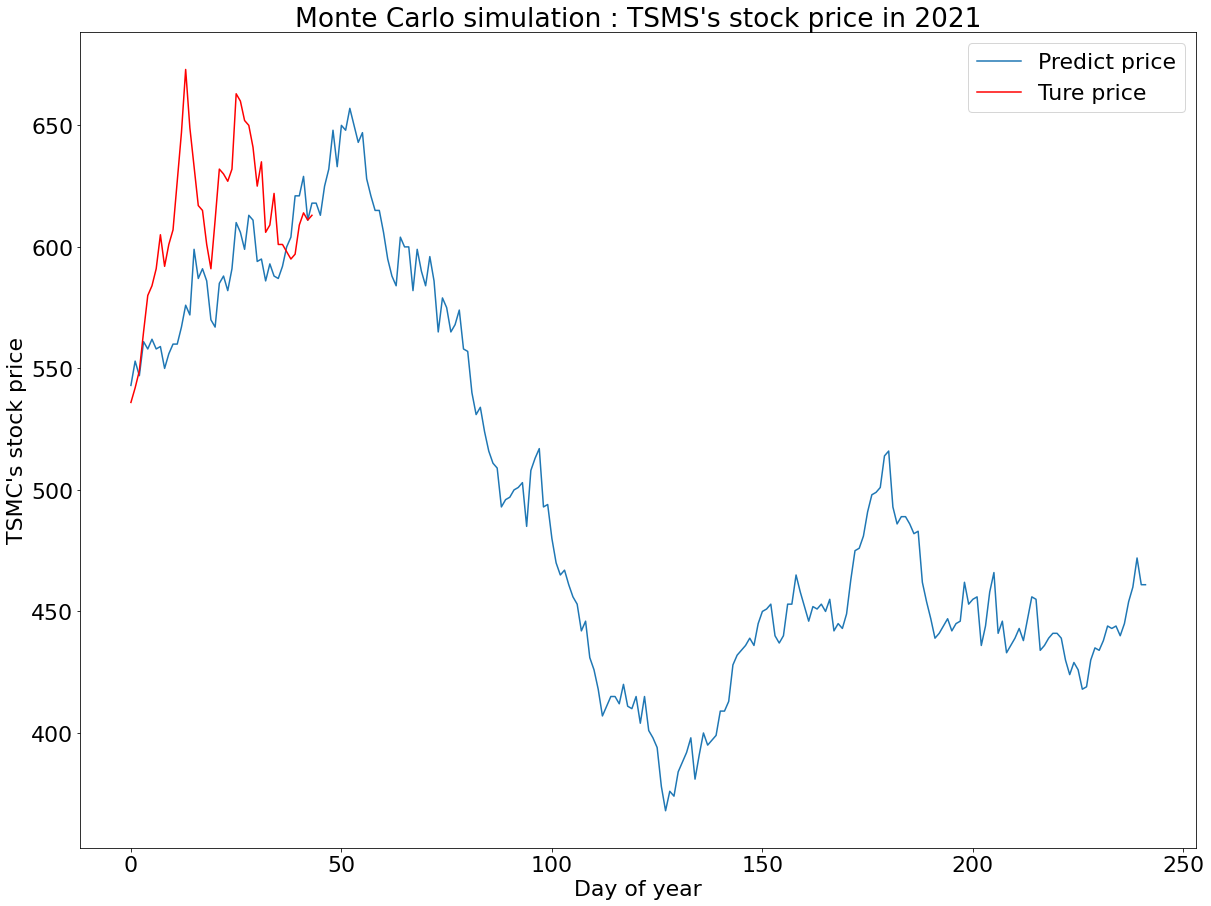

In [101]:
# Visualization
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(20,15))
plt.plot(stock_price_predict, label = "Predict price")
plt.plot(stock_price_2021 , color = "r" , label = "Ture price")
plt.xlabel("Day of year")
plt.ylabel("TSMC's stock price")
plt.title("Monte Carlo simulation : TSMS's stock price in 2021") 
plt.legend()
plt.show()